In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import arviz as az
import numpy as np

In [13]:
flows = pd.read_csv(r"..\..\UK-wood-mfa\build\flows.csv")
flows_obs= pd.read_csv(r'..\..\UK-wood-mfa\build\flows_obs.csv')
Observations = pd.read_excel(r"..\..\UK-wood-mfa\data\observations_with_references.xlsx")
flows_name = pd.read_excel(r'..\..\UK-wood-mfa\lists\flows_name.xlsx')
products_consumption = pd.read_excel(r'..\..\UK-wood-mfa\data_analysis\finished_products_consumption.xlsx')
products_consumption = products_consumption.set_index(['target'])



In [14]:
flows_name = list(flows_name.to_records())
flows_obs_list = list(flows_obs.to_records())

In [15]:
link = 'http://ukfires.org/analyses/UK-wood/system/'
Consumption = 'Consumption'

In [16]:
#UK consumption of finished products
link = 'http://ukfires.org/analyses/UK-wood/system/'
consumed_products = []
for flow in flows_name:
            consumption_flow_products = flows.loc[(flows['material'] == flow[3]) 
                                       & (flows['source'] == flow[1])
                                       & (flows['target'] == flow[2])]
            if (((link + 'PackagingConsumption') in flow[2])
                or ((link + 'GraphicPapersConsumption') in flow[2])
                or ((link + 'SanitaryPapersConsumption') in flow[2])
                or ((link + 'OtherPaperProductsConsumption') in flow[2])
                 

                or ((link + 'WindowsConsumption') in flow[2]) 
                or ((link + 'DoorsConsumption') in flow[2])
                or ((link + 'FlooringConsumption') in flow[2])
                
                or ((link + 'PalletsConsumption') in flow[2])
                or ((link + 'RefurbishedPalletsConsumption') in flow[2])
                or ((link + 'OtherWoodContainersConsumption') in flow[2])
                 
                or ((link + 'DeckingConsumption') in flow[2])
                or ((link + 'FencingPostsConsumption') in flow[2])
                or ((link + 'WoodenOutbuildingsConsumption') in flow[2])
                or ((link + 'FencingRailsAnsBoardsConsumption') in flow[2])
                 
                 
                or ((link + 'OtherEnergyFeedstocksConsumption') in flow[2])
                or ((link + 'PreConsumerWasteProductsConsumption') in flow[2])
                or ((link + 'WoodCharcoalConsumption') in flow[2])
                
                or ((link + 'WoodPelletsConsumption') in flow[2])
                 or ((link + 'WoodWoolAndFlourConsumption') in flow[2])
                or ((link + 'OtherEngineeredWoodProductsConsumption') in flow[2])
                 
                or ((link + 'WoodFloorFramingForNewStructures') in flow[2])
                or ((link + 'WoodRoofsForNewStructures') in flow[2])
                or ((link + 'WoodFramesForNewStructures') in flow[2])
                 
                or ((link + 'RenovationsSawnwoodConsumption') in flow[2])
                or ((link + 'SawnwoodToRMIAndOtherConsumption') in flow[2])
                or ((link + 'ParticleboardToRMIAndOtherConsumption') in flow[2])
                or ((link + 'PlywoodToRMIAndOtherConsumption') in flow[2])
                 
                or ((link + 'WoodenKitchenFurnitureConsumption') in flow[2])
                or ((link + 'WoodenSeatsConsumption') in flow[2])
                or ((link + 'WoodenBedroomFurnitureConsumption') in flow[2])
                or ((link + 'WoodenOfficeFurnitureConsumption') in flow[2])
                or ((link + 'WoodenOtherFurnitureConsumption') in flow[2])
                 
                or ((link + 'FormworkScaffoldingConsumption') in flow[2])
                or ((link + 'OtherObjectsConsumption') in flow[2]
                or ((link + 'FibreboardToRMIAndOtherConsumption') in flow[2])
                or ((link + 'RailwaySleepersConsumption' ) in flow[2]))):
                    if ((('exports') not in flow[2])
                        and (('imports') not in flow[1])
                       # and (('Consumption') not in flow[2])
                        and (('Manufacturing') not in flow[2])
                        and (('WoodFibres') not in flow[2])
                        and (('Roundwood') not in flow[2])
                        and (('PostConsumerWood') not in flow[2])
                        and (('Production') not in flow[2])
                        and (('ByProducts') not in flow[2])):
                                                            
                            consumption_flow_products = consumption_flow_products.set_index("target")
                          


                            consumption_products_renamed= consumption_flow_products.rename(index={
                                                                                                  link + 'OtherObjectsConsumption' : 'Total',
                                                                                                   link + 'FormworkScaffoldingConsumption': 'Total',
                                                                                                   link + 'RailwaySleepersConsumption' : 'Total',
                                                                                                    link + 'WoodCharcoalConsumption': 'Other energy feedstocks',
                                                                                                   link + 'WoodWoolAndFlourConsumption' : 'Other objects',
                                                                                                    link + 'OtherEngineeredWoodProductsConsumption' : 'Other engineered products to construction',
                                                                                                   link + 'GraphicPapersConsumption': 'Total',
                                                                                                   link + 'WindowsConsumption': 'Total',
                                                                                                   link + 'DoorsConsumption': 'Total',
                                                                                                   link + 'FlooringConsumption': 'Total',
                                                                                                   link + 'PreConsumerWasteProductsConsumption': 'Total',
                                                                                                   link + 'OtherWoodContainersConsumption':'Total',
                                                                                                   link + 'SanitaryPapersConsumption': 'Total',
                                                                                                   link + 'PackagingConsumption':'Total',
                                                                                                   link + 'PalletsConsumption' : 'Total',
                                                                                                   link + 'RefurbishedPalletsConsumption' : 'Total',
                                                                                                   link + 'OtherPaperProductsConsumption': 'Total',
                                                                                                   link + 'WoodenKitchenFurnitureConsumption' : 'Total',
                                                                                                   link + 'WoodenSeatsConsumption': 'Total',
                                                                                                   link + 'WoodenBedroomFurnitureConsumption': 'Total',
                                                                                                   link + 'WoodenOfficeFurnitureConsumption': 'Total',
                                                                                                   link + 'WoodenOtherFurnitureConsumption': 'Total',

                                                                                        
                                                                                                   link + 'PreConsumerWasteProductsConsumption':'Total',
                                                                                                   link + 'PreConsumerWasteConstructionConsumption': 'Total',

                                                                                                   link + 'WoodenOutbuildingsConsumption':'Total',
                                                                                                   link + 'FencingRailsAndBoardsConsumption': 'Total',
                                                                                                   link + 'FencingPostsConsumption': 'Total',
                                                                                                   link + 'DeckingConsumption': 'Total',

                                                                                                   link + 'OtherEnergyFeedstocksConsumption': 'Total',


                                                                                                   link + 'WoodPelletsConsumption':'Total',


                                                                                                   link + 'WoodFloorFramingForNewStructures': 'Total',
                                                                                                   link + 'WoodRoofsForNewStructures': 'Total',
                                                                                                   link + 'WoodFramesForNewStructures': 'Total',

                                                                                                   link + 'RenovationsSawnwoodConsumption': 'Total',
                                                                                                   link + 'SawnwoodToRMIAndOtherConsumption': 'Total',
                                                                                                   link + 'ParticleboardToRMIAndOtherConsumption': 'Total',
                                                                                                   link + 'PlywoodToRMIAndOtherConsumption': 'Total',
                                                                                                   link + 'FibreboardToRMIAndOtherConsumption': 'Total',
                                                                                                    })


                            consumed_products.append(consumption_products_renamed)

                   
consumed_products = pd.concat(consumed_products)  


consumed_products= consumed_products.reset_index(level='target')
consumed_products = consumed_products.groupby(['target','sample']).sum()
consumed_products = consumed_products.reset_index(level='sample')
consumed_products= consumed_products.reset_index(level='target')
consumed_products.to_clipboard()
consumed_products['value']=consumed_products['value'] / 1000000000
consumed_products.to_clipboard()

C:\Users\rla44\AppData\Local\Temp\ipykernel_1648\2277334706.py:127: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  consumed_products = consumed_products.groupby(['target','sample']).sum()


In [17]:
custom_order = [
    "Total",
  
]

# Convert 'target' column to a categorical data type with the custom order
consumed_products["target"] = pd.Categorical(consumed_products["target"], categories=custom_order, ordered=True)

# Sort the DataFrame based on the 'target' column
consumed_products_sorted = consumed_products.sort_values(by="target")

# Reset the index to maintain a continuous index
consumed_products_sorted = consumed_products_sorted.reset_index(drop=True)


In [18]:
Means = consumed_products_sorted.groupby('target')['value'].mean()
df= pd.DataFrame(Means)


In [19]:
print(consumed_products)

      target  sample      value      quantity
0        NaN       0   0.091054  9.105384e+07
1        NaN       1   0.118185  1.181849e+08
2        NaN       2   0.116447  1.164471e+08
3        NaN       3   0.132844  1.328442e+08
4        NaN       4   0.113496  1.134961e+08
...      ...     ...        ...           ...
29995  Total    9995  67.827205  6.727043e+10
29996  Total    9996  68.939501  6.837791e+10
29997  Total    9997  69.776675  6.918778e+10
29998  Total    9998  69.629417  6.903008e+10
29999  Total    9999  65.532906  6.497247e+10

[30000 rows x 4 columns]


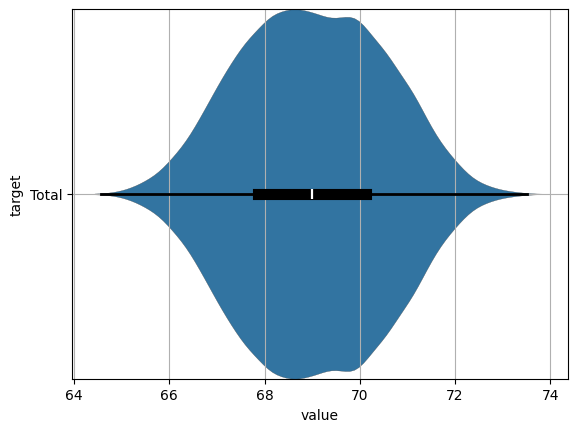

,Object,Uncertainty index,min,max,mean,median,diff_min,diff_max
0,Total,0.129729,64.567975,73.519794,69.003733,68.994198,4.435758,-4.516062


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

         

sns.violinplot(
    x="value",
    y="target",
    width=1,
   # hue= "target",
    data=consumed_products,
    linewidth=0.2,
   # hue="target",
    density_norm="width",
    orient="h",
    inner_kws=dict(box_width=8, whis_width=2, color="black"),
    inner="box",
    cut=0,
    zorder=1,
)

# Set the title of the plot
plt.title("")

# Calculate the difference ratio for each unique 'target'
difference_ratios = []  # List to store the ratios

# Group the data by 'target'
grouped = consumed_products.groupby("target")

for name, group in grouped:
    data = group["value"]
    k = 1.5

    # Calculate quartiles and IQR
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    # Calculate bounds for outlier detection
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    # Exclude outliers
    filtered_data = [x for x in data if lower_bound <= x <= upper_bound]

    # Calculate minimum and maximum within the non-outlier range
    min_non_outlier = np.min(filtered_data)
    max_non_outlier = np.max(filtered_data)
    
    mean_val = group["value"].mean()
    median_val = group["value"].median()
    Diff_min =  mean_val - min_non_outlier
    Diff_max =  mean_val - max_non_outlier

    difference_ratio = (max_non_outlier - min_non_outlier) / mean_val

    difference_ratios.append((name, difference_ratio,min_non_outlier,max_non_outlier, mean_val,median_val, Diff_min, Diff_max) )  # Store the target name and ratio
    
    
difference_ratios
plt.grid(True)

plt.show()

difference_ratio_df = pd.DataFrame(difference_ratios, columns=['Object', 'Uncertainty index', 'min', 'max', 'mean', 'median', 'diff_min', 'diff_max'])
difference_ratio_df

In [21]:
# Sort the DataFrame by the 'Value' column in descending order
df = difference_ratio_df .sort_values(by='Uncertainty index', ascending=False)
df= df.set_index('Object')


# Create a gradient color map for the 'Value' column
def gradient_color(val):
    max_val = df['Uncertainty index'].max()
    min_val = df['Uncertainty index'].min()
    normalized_value = (val - min_val) / (max_val - min_val)
    r = int(255 * (1 - normalized_value))
    return f'background-color: rgba(255, {r}, 2, 0.5)'


styled_df = df.style.applymap(lambda x: gradient_color(x), subset=['Uncertainty index'])

# Display the styled DataFrame

styled_df

C:\Users\rla44\AppData\Local\Temp\ipykernel_1648\1195321782.py:10: RuntimeWarning: invalid value encountered in scalar divide
  normalized_value = (val - min_val) / (max_val - min_val)


ValueError: cannot convert float NaN to integer

In [22]:
# Specify the file path along with the file name
file_path = r'C:/Users\rla44/OneDrive - University of Bath\MFA graphs/sankey_diagram_3102023'


# Save the plot with the specified file path
fig.savefig(file_path, format='pdf')

# Optionally, specify DPI for higher quality
# plt.savefig(file_path, format='pdf', dpi=300)

NameError: name 'fig' is not defined